In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [152]:
customers = pd.read_csv("./datasets/AWCustomers.csv")

In [153]:
customers["Title"].dropna(inplace=True)
customers.set_index("CustomerID", inplace=True)

In [154]:
customers.head()

,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
CustomerID,,,,,,,,,,,,,,,,,,,,,
21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,Australia,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,Canada,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,United States,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,United Kingdom,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,Germany,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [155]:
sales = pd.read_csv("./datasets/AWSales.csv")

In [156]:
sales.set_index("CustomerID", inplace=True)

In [157]:
data = pd.merge(
    customers,
    sales,
    left_index=True,
    right_index=True,
)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18361 entries, 21173 to 16676
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 101 non-null    object 
 1   FirstName             18361 non-null  object 
 2   MiddleName            10572 non-null  object 
 3   LastName              18361 non-null  object 
 4   Suffix                3 non-null      object 
 5   AddressLine1          18361 non-null  object 
 6   AddressLine2          311 non-null    object 
 7   City                  18361 non-null  object 
 8   StateProvinceName     18361 non-null  object 
 9   CountryRegionName     18361 non-null  object 
 10  PostalCode            18361 non-null  object 
 11  PhoneNumber           18361 non-null  object 
 12  BirthDate             18361 non-null  object 
 13  Education             18361 non-null  object 
 14  Occupation            18361 non-null  object 
 15  Gender              

In [159]:
data.shape

(18361, 25)

In [160]:
data["AddressLine2"].isna().sum()

np.int64(18050)

In [161]:
data.columns

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [162]:
data.drop(columns=["AddressLine2", "AddressLine1", "PhoneNumber"], inplace=True)

In [163]:
from scipy.stats import chi2_contingency


name_columns = ["FirstName", "MiddleName", "LastName"]

for col in name_columns:
    contingency_table = pd.crosstab(data[col], data["BikeBuyer"])

    if contingency_table.shape[0] < 2:
        print(f"⚠️ Skipping {col}: not enough unique values for chi-square test\n")
        continue

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {col}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

    if p < 0.05:
        print(
            "Significant relationship with BikeBuyer\n"
        )
    else:
        print("No significant relationship\n")

Chi-square Test for FirstName:
Chi2 = 879.58, p-value = 0.0000
Significant relationship with BikeBuyer

Chi-square Test for MiddleName:
Chi2 = 42.88, p-value = 0.4766
No significant relationship

Chi-square Test for LastName:
Chi2 = 382.40, p-value = 0.3710
No significant relationship



In [164]:
data.drop(columns=["MiddleName", "LastName"] , inplace=True)

In [165]:
data["Suffix"].isna().value_counts()

Suffix
True     18358
False        3
Name: count, dtype: int64

In [166]:
data.drop(columns=["Suffix"] , inplace=True)

In [167]:
data["BirthDate"] = pd.to_datetime(data["BirthDate"])

In [168]:
data["Education"].value_counts()

Education
Bachelors              5325
Partial College        5024
High School            3274
Graduate Degree        3163
Partial High School    1575
Name: count, dtype: int64

Use missing indicator to salvage title column
> from sklearn.impute import MissingIndicator


In [170]:
data.drop(columns=["LastUpdated"], inplace=True)

In [171]:
data["BirthDate"]

CustomerID
21173   1987-11-13
13249   1972-07-21
29350   1985-11-09
13503   1977-10-18
22803   1975-02-05
           ...    
25414   1990-11-11
11459   1992-10-13
12160   1983-11-24
14353   1995-06-15
16676   1986-03-26
Name: BirthDate, Length: 18361, dtype: datetime64[ns]

In [172]:
from datetime import date

today = pd.to_datetime(date.today())

data["Age"] = today.year - data["BirthDate"].dt.year

In [173]:
data.drop(columns=["BirthDate"], inplace=True)

In [174]:
pd.crosstab(index=data["Age"], columns=data["BikeBuyer"]).T

Age,25,26,27,28,29,30,31,32,33,34,...,85,86,87,88,89,90,92,93,94,95
BikeBuyer,,,,,,,,,,,,,,,,,,,,,
0,150,196,238,218,251,292,327,335,265,283,...,2,2,0,1,3,1,1,2,2,1
1,103,124,151,167,176,182,184,202,288,307,...,1,1,2,0,0,0,2,0,0,0


In [175]:
data.columns

Index(['Title', 'FirstName', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend', 'Age'],
      dtype='object')

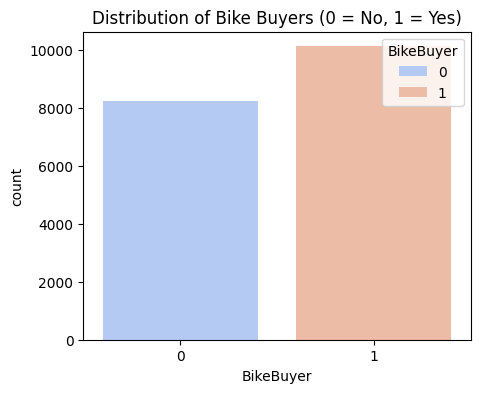

In [177]:
plt.figure(figsize=(5, 4))
sns.countplot(x="BikeBuyer", data=data, hue="BikeBuyer", palette="coolwarm")
plt.title("Distribution of Bike Buyers (0 = No, 1 = Yes)")
plt.show()

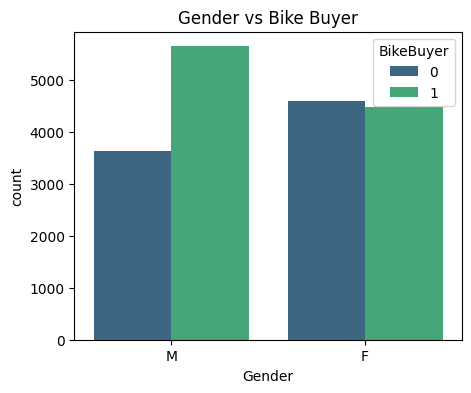

In [178]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='BikeBuyer', data=data, palette='viridis')
plt.title("Gender vs Bike Buyer")
plt.show()


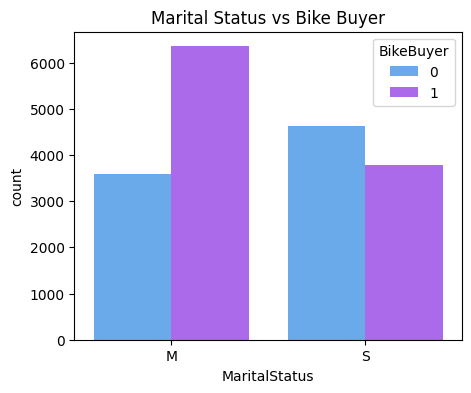

In [179]:
plt.figure(figsize=(5,4))
sns.countplot(x='MaritalStatus', hue='BikeBuyer', data=data, palette='cool')
plt.title("Marital Status vs Bike Buyer")
plt.show()


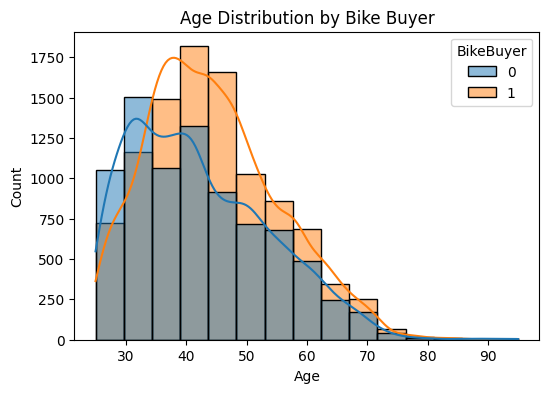

In [180]:
plt.figure(figsize=(6,4))
sns.histplot(data, x='Age', hue='BikeBuyer', kde=True, bins=15)
plt.title("Age Distribution by Bike Buyer")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3475424067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BikeBuyer', y='YearlyIncome', data=data, palette='Set2')


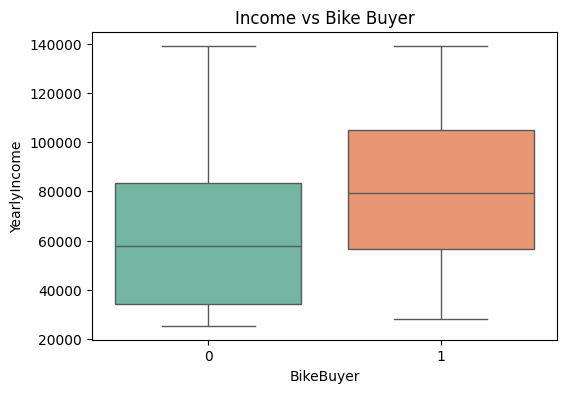

In [181]:
plt.figure(figsize=(6,4))
sns.boxplot(x='BikeBuyer', y='YearlyIncome', data=data, palette='Set2')
plt.title("Income vs Bike Buyer")
plt.show()


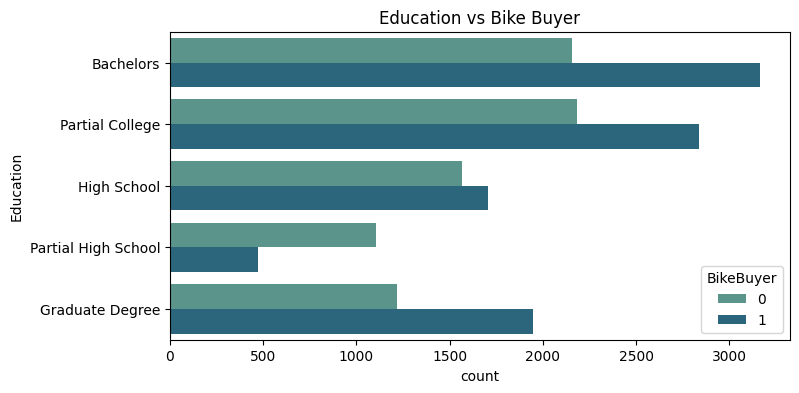

In [182]:
plt.figure(figsize=(8,4))
sns.countplot(y='Education', hue='BikeBuyer', data=data, palette='crest')
plt.title("Education vs Bike Buyer")
plt.show()


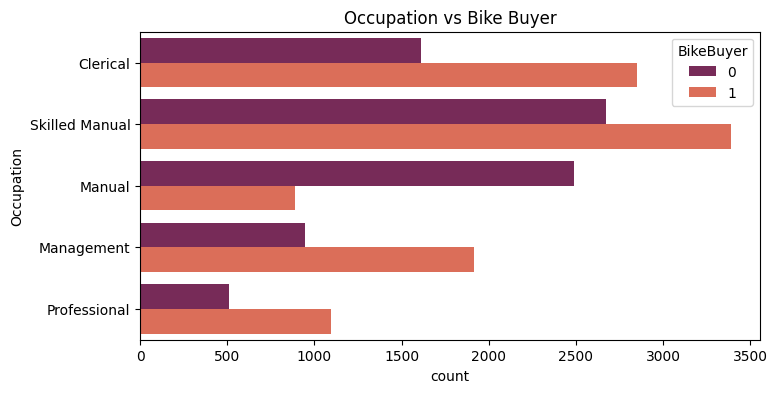

In [183]:
plt.figure(figsize=(8,4))
sns.countplot(y='Occupation', hue='BikeBuyer', data=data, palette='rocket')
plt.title("Occupation vs Bike Buyer")
plt.show()


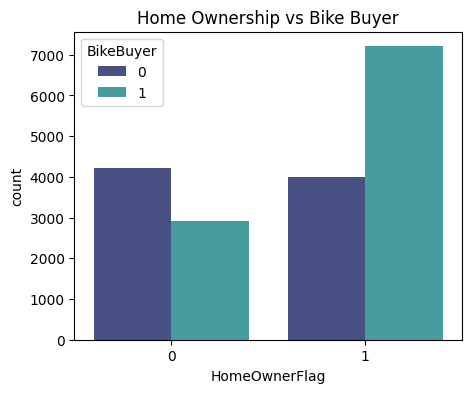

In [184]:
plt.figure(figsize=(5,4))
sns.countplot(x='HomeOwnerFlag', hue='BikeBuyer', data=data, palette='mako')
plt.title("Home Ownership vs Bike Buyer")
plt.show()


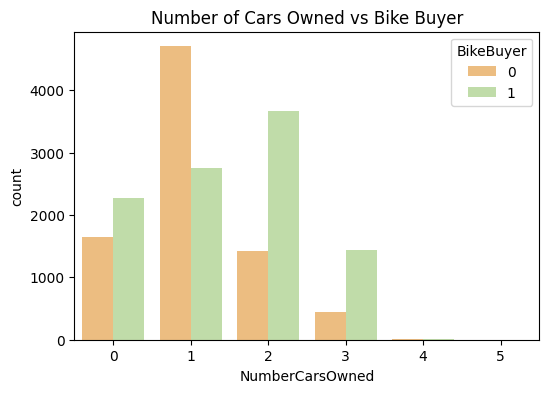

In [185]:
plt.figure(figsize=(6,4))
sns.countplot(x='NumberCarsOwned', hue='BikeBuyer', data=data, palette='Spectral')
plt.title("Number of Cars Owned vs Bike Buyer")
plt.show()


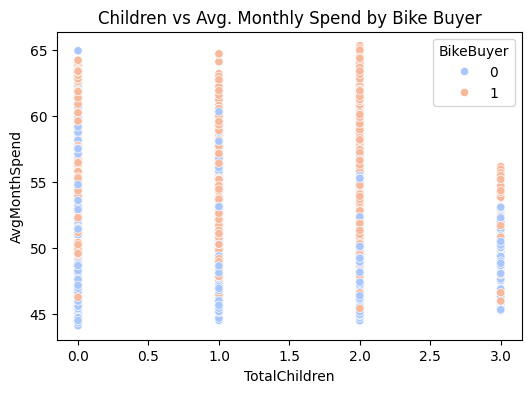

In [186]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalChildren', y='AvgMonthSpend', hue='BikeBuyer', data=data, palette='coolwarm')
plt.title("Children vs Avg. Monthly Spend by Bike Buyer")
plt.show()


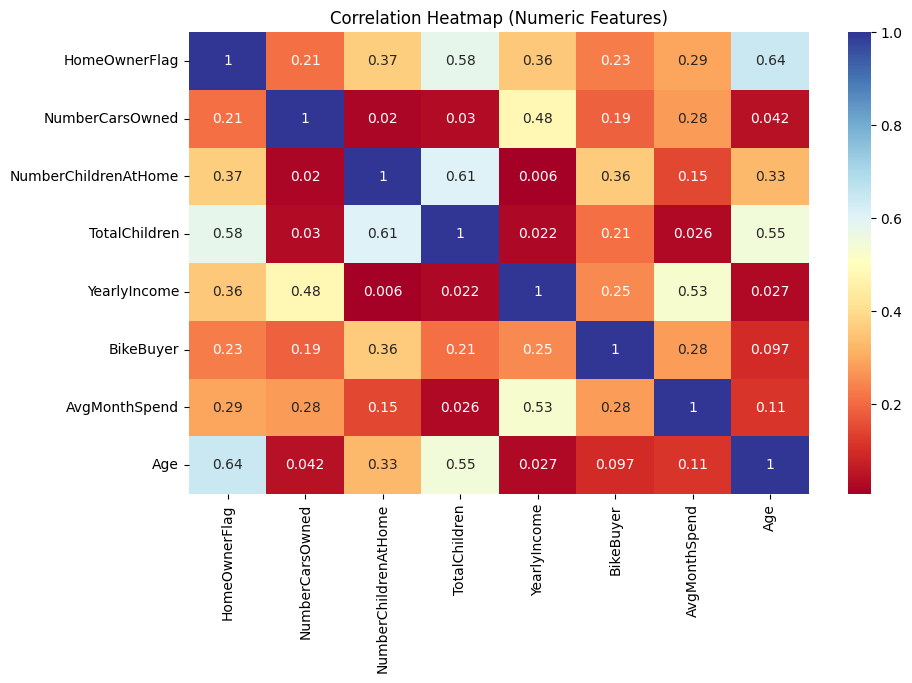

In [187]:
numeric_cols = data.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()




- Higher yearly income correlates with higher bike purchases.
- Bike buyers tend to be younger on average.
- Homeowners and those with fewer cars show higher bike buying rates.
- Gender and marital status show notable differences in buying behavior.
- Occupation and education level also influence purchase decisions.


Q.1 Based on Feature Selection, Cleaning, and Preprocessing to Construct an Input from Data
Source
- (a) Examine the values of each attribute and select a set of attributes only that would affect to
predict future bike buyers to create your input for data mining algorithms. Remove all the
unnecessary attributes. (Select features just by analysis).
- (b) Create a new Data Frame with the selected attributes only.
- (c) Determine a Data value type (Discrete, or Continuous, then Nominal, Ordinal, Interval,
Ratio) of each attribute in your selection to identify preprocessing tasks to create input for your
data mining

In [188]:
data.columns

Index(['Title', 'FirstName', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend', 'Age'],
      dtype='object')

In [189]:
import pandas as pd

data_type_summary = {
    "Title": ("Discrete", "Nominal", "Categorical (encode using label/one-hot)"),
    "FirstName": ("Discrete", "Nominal", "Identifier — drop column"),
    "MiddleName": ("Discrete", "Nominal", "Identifier — drop column"),
    "LastName": ("Discrete", "Nominal", "Identifier — drop column"),
    "City": ("Discrete", "Nominal", "Categorical — encode"),
    "StateProvinceName": ("Discrete", "Nominal", "Categorical — encode"),
    "CountryRegionName": ("Discrete", "Nominal", "Categorical — encode"),
    "PostalCode": ("Discrete", "Nominal", "Identifier — drop or group by region"),
    "Education": ("Discrete", "Ordinal", "Ordered — use integer/label encoding"),
    "Occupation": ("Discrete", "Nominal", "Categorical — encode using one-hot"),
    "Gender": ("Discrete", "Nominal", "Binary — encode as 0/1"),
    "MaritalStatus": ("Discrete", "Nominal", "Binary — encode as 0/1"),
    "HomeOwnerFlag": ("Discrete", "Nominal", "Binary flag — already numeric"),
    "NumberCarsOwned": ("Discrete", "Ratio", "Count — keep numeric"),
    "NumberChildrenAtHome": ("Discrete", "Ratio", "Count — keep numeric"),
    "TotalChildren": ("Discrete", "Ratio", "Count — keep numeric"),
    "YearlyIncome": ("Continuous", "Ratio", "Continuous — normalize/scale"),
    "BikeBuyer": ("Discrete", "Nominal", "Target variable (0 = No, 1 = Yes)"),
    "AvgMonthSpend": ("Continuous", "Ratio", "Continuous — normalize/scale"),
    "Age": ("Continuous", "Ratio", "Numeric — normalize or bin"),
}


df_summary = pd.DataFrame.from_dict(
    data_type_summary,
    orient="index",
    columns=["Type", "Measurement Scale", "Preprocessing Notes"],
)

print("===== Attribute Data Type Summary =====\n")
df_summary

===== Attribute Data Type Summary =====



,Type,Measurement Scale,Preprocessing Notes
Title,Discrete,Nominal,Categorical (encode using label/one-hot)
FirstName,Discrete,Nominal,Identifier — drop column
MiddleName,Discrete,Nominal,Identifier — drop column
LastName,Discrete,Nominal,Identifier — drop column
City,Discrete,Nominal,Categorical — encode
StateProvinceName,Discrete,Nominal,Categorical — encode
CountryRegionName,Discrete,Nominal,Categorical — encode
PostalCode,Discrete,Nominal,Identifier — drop or group by region
Education,Discrete,Ordinal,Ordered — use integer/label encoding
Occupation,Discrete,Nominal,Categorical — encode using one-hot


Q.2 Is there a significant difference in the average income of customers who purchased a bike
vs. those who did not? 

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

===== Independent t-test: Yearly Income vs BikeBuyer =====
T-statistic: 34.665
P-value: 0.0000
✅ There is a significant difference in average income between buyers and non-buyers.



C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3650790937.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BikeBuyer", y="YearlyIncome", data=data, palette="coolwarm")


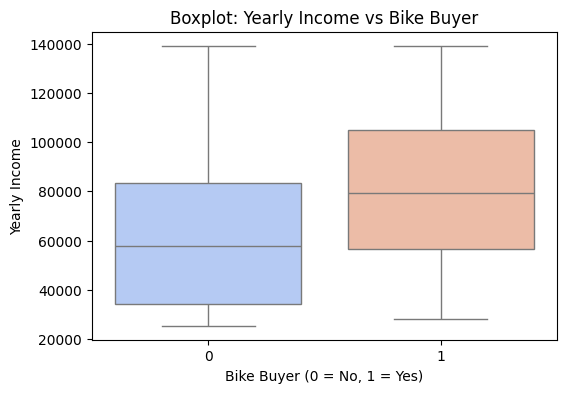

C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3650790937.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="BikeBuyer", y="YearlyIncome", data=data, palette="viridis")


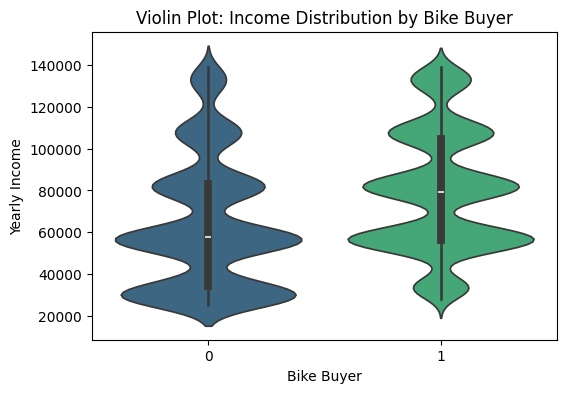

C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3650790937.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(buyers, shade=True, label="Bike Buyers", color="blue")
C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3650790937.py:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_buyers, shade=True, label="Non-Bike Buyers", color="red")


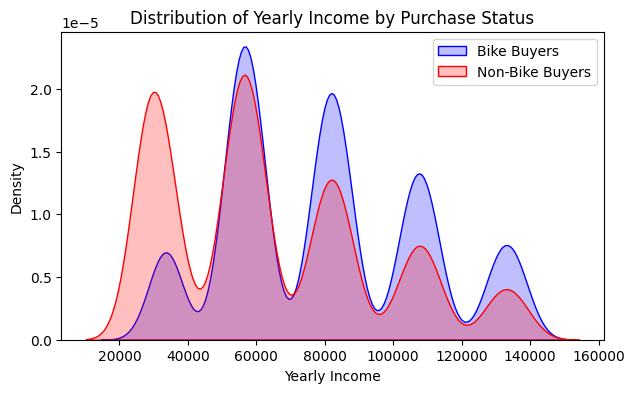

C:\Users\HP\AppData\Local\Temp\ipykernel_31196\3650790937.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


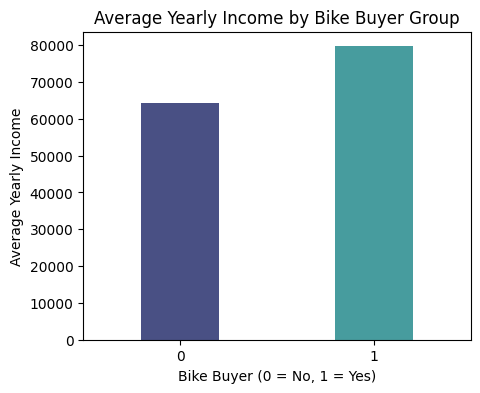

In [191]:
buyers = data[data["BikeBuyer"] == 1]["YearlyIncome"]
non_buyers = data[data["BikeBuyer"] == 0]["YearlyIncome"]


t_stat, p_value = ttest_ind(buyers, non_buyers, equal_var=False)

print("===== Independent t-test: Yearly Income vs BikeBuyer =====")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(
        "✅ There is a significant difference in average income between buyers and non-buyers.\n"
    )
else:
    print(
        "❌ No significant difference in average income between buyers and non-buyers.\n"
    )

plt.figure(figsize=(6, 4))
sns.boxplot(x="BikeBuyer", y="YearlyIncome", data=data, palette="coolwarm")
plt.title("Boxplot: Yearly Income vs Bike Buyer")
plt.xlabel("Bike Buyer (0 = No, 1 = Yes)")
plt.ylabel("Yearly Income")
plt.show()


plt.figure(figsize=(6, 4))
sns.violinplot(x="BikeBuyer", y="YearlyIncome", data=data, palette="viridis")
plt.title("Violin Plot: Income Distribution by Bike Buyer")
plt.xlabel("Bike Buyer")
plt.ylabel("Yearly Income")
plt.show()


plt.figure(figsize=(7, 4))
sns.kdeplot(buyers, shade=True, label="Bike Buyers", color="blue")
sns.kdeplot(non_buyers, shade=True, label="Non-Bike Buyers", color="red")
plt.title("Distribution of Yearly Income by Purchase Status")
plt.xlabel("Yearly Income")
plt.legend()
plt.show()


income_means = data.groupby("BikeBuyer")["YearlyIncome"].mean().reset_index()

plt.figure(figsize=(5, 4))
sns.barplot(
    x="BikeBuyer", y="YearlyIncome", data=income_means, palette="mako", width=0.4
)
plt.title("Average Yearly Income by Bike Buyer Group")
plt.xlabel("Bike Buyer (0 = No, 1 = Yes)")
plt.ylabel("Average Yearly Income")
plt.show()

Q.3 What percentage of customers in each commute distance category purchased a bike? 


In [ ]:
# There is no col as commute distance

Q.4 Does age distribution differ between bike buyers and non-buyers? 


C:\Users\HP\AppData\Local\Temp\ipykernel_31196\946067426.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(buyers_age, shade=True, label="Bike Buyers", color="blue")
C:\Users\HP\AppData\Local\Temp\ipykernel_31196\946067426.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_buyers_age, shade=True, label="Non-Bike Buyers", color="red")


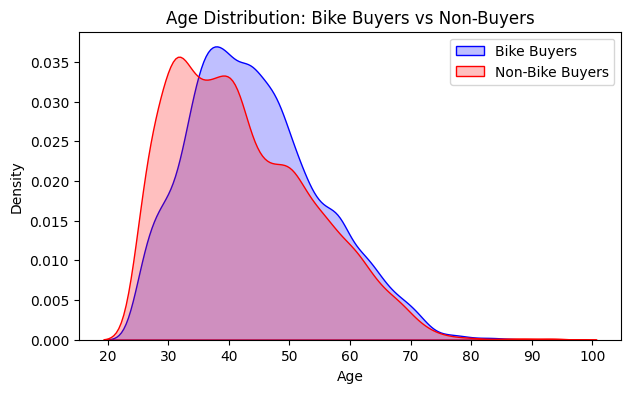

===== Q4: Age Distribution Difference =====
T-statistic: 13.181, P-value: 0.0000
✅ Significant difference in age distribution between buyers and non-buyers.



In [193]:
from scipy.stats import ttest_ind

buyers_age = data[data["BikeBuyer"] == 1]["Age"]
non_buyers_age = data[data["BikeBuyer"] == 0]["Age"]


plt.figure(figsize=(7,4))
sns.kdeplot(buyers_age, shade=True, label="Bike Buyers", color="blue")
sns.kdeplot(non_buyers_age, shade=True, label="Non-Bike Buyers", color="red")
plt.title("Age Distribution: Bike Buyers vs Non-Buyers")
plt.xlabel("Age")
plt.legend()
plt.show()


t_stat, p_val = ttest_ind(buyers_age, non_buyers_age, equal_var=False)

print("===== Q4: Age Distribution Difference =====")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in age distribution between buyers and non-buyers.\n")
else:
    print("❌ No significant difference in age distribution.\n")


Q.5 Is the proportion of bike buyers different across marital status categories? 

BikeBuyer         0     1
MaritalStatus            
M              3597  6350
S              4633  3781

Chi2 = 657.687, P-value = 0.0000
✅ Significant difference in bike buying proportion across marital statuses.



C:\Users\HP\AppData\Local\Temp\ipykernel_31196\809558534.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MaritalStatus", y="BikeBuyer", data=marital_percent, palette="viridis")


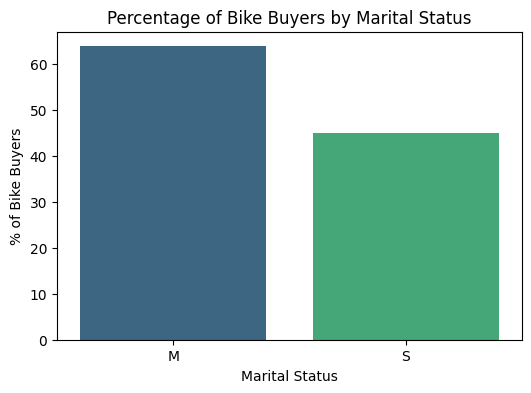

In [195]:
from scipy.stats import chi2_contingency

marital_table = pd.crosstab(data["MaritalStatus"], data["BikeBuyer"])

chi2, p, dof, expected = chi2_contingency(marital_table)

print(marital_table)
print(f"\nChi2 = {chi2:.3f}, P-value = {p:.4f}")

if p < 0.05:
    print(
        "✅ Significant difference in bike buying proportion across marital statuses.\n"
    )
else:
    print("❌ No significant difference across marital statuses.\n")


marital_percent = data.groupby("MaritalStatus")["BikeBuyer"].mean().reset_index()
marital_percent["BikeBuyer"] *= 100

plt.figure(figsize=(6, 4))
sns.barplot(x="MaritalStatus", y="BikeBuyer", data=marital_percent, palette="viridis")
plt.title("Percentage of Bike Buyers by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("% of Bike Buyers")
plt.show()